In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
x = torch.linspace(-1,1,20)
ep = torch.rand(x.shape)*0.1
y = x**2

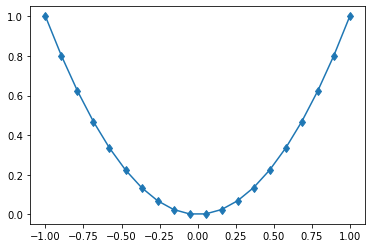

In [5]:
plt.plot(x,y, 'd-')

In [6]:
n = 20
layers = []
layers.append(nn.Linear(1,n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,1))

mlp = nn.Sequential(*layers)

In [7]:
xb, yb = x[:, None], y[:, None]
print(x.shape, xb.shape)

torch.Size([20]) torch.Size([20, 1])


In [8]:
yprime = mlp(xb)
yprime.shape

torch.Size([20, 1])

In [9]:
yprime2 = yprime.squeeze().detach()

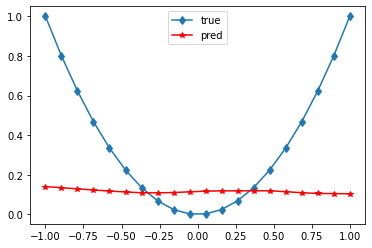

In [10]:
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

In [11]:
loss = F.mse_loss(yb,yprime )
loss

tensor(0.1696, grad_fn=<MeanBackward0>)

In [12]:
loss.backward()

In [13]:
lr  = 1e-1
for name, param in mlp.named_parameters():
#     print(param)
    param.data = param.data - param.grad*lr

In [14]:
mlp.zero_grad()

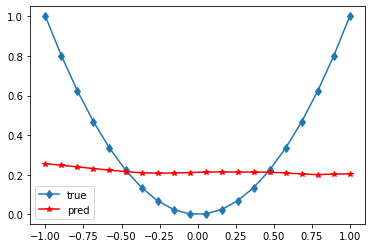

In [15]:
yprime = mlp(xb)
yprime2 = yprime.squeeze().detach()
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

# loop 

In [16]:
epochs = 100
for i in range(epochs):
    yprime = mlp(xb)
    loss = F.mse_loss(yb,yprime )
    loss.backward()
    lr  = 1e-1
    for name, param in mlp.named_parameters():
        param.data = param.data - param.grad*lr
    mlp.zero_grad()

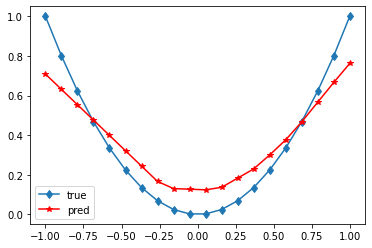

In [17]:
yprime = mlp(xb)
yprime2 = yprime.squeeze().detach()
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

In [18]:
x2 = torch.linspace(-1,1,200)
x2b = x2[:, None]

In [19]:
y2prime = mlp(x2b)

In [20]:
y2prime_2 = y2prime.squeeze().detach()

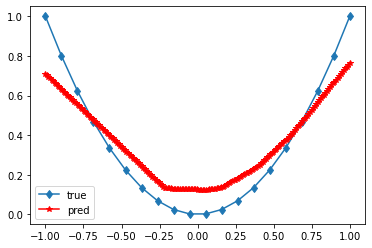

In [21]:
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x2, y2prime_2, '*r-', label= 'pred')
plt.legend()

# Starting here

In [22]:
def add_one(self):
    self = self+1
    return self
Unicorn = type('unicorn', (int,), {"add_one":add_one})

In [23]:
uu = Unicorn(1)

In [24]:
uu.add_one()

2

In [25]:
uu

1

In [26]:
# class Make_nn_module_from_function(nn.Module):
#     def __init__(self, fn):
#         super(Make_nn_module_from_function)
#         self.fn = fn
#     def foward(self, _input): return self.fn(_input)

In [118]:
class Sine(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, _input):
        return torch.sin(_input)

In [119]:
s = Sine()

In [120]:
# Sine = Make_nn_module_from_function(torch.sin)

In [121]:
def make_mlp(n = 20, layers_count = 3):
    act = Sine # torch.ReLU
    layers = []
    layers.append(nn.Linear(1,n))
    layers.append(act())
    for i in range(layers_count -2):
        layers.append(nn.Linear(n,n))
        layers.append(act())
    layers.append(nn.Linear(n,1))
    mlp = nn.Sequential(*layers)
    return mlp

In [122]:
mlp = make_mlp(100, 4)

In [123]:
mlp

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Sine()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sine()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): Sine()
  (6): Linear(in_features=100, out_features=1, bias=True)
)

In [124]:
# for i in range(100):
#     yprime_out = do_step(mlp)

In [125]:
# plt.plot(x,y, 'd-', label = 'true')
# plt.plot(x, yprime_out, '*r-', label= 'pred')
# plt.legend()

In [126]:
# # Show an animiation

# from matplotlib.animation import FuncAnimation
# from IPython import display

# fig = plt.figure()
# ax = plt.axes(xlim=(-1.1, 1.1), ylim = (-0.2, 1.5))
# line, = ax.plot([], [], 'd-', label = 'pred')
# ax.plot(x,y, 'd-', label = 'true')
# ax.legend()

# def frame_function(frame_num, mlp):
#     if frame_num % 50 ==0: print(f"On frame {frame_num}")
#     yprime_out = do_step(mlp)
#     line.set_data(x,yprime_out)

In [127]:
# mlp = make_mlp(100, 4)
# anim = FuncAnimation(fig, frame_function, fargs = (mlp, ), frames = 300, interval = 20, blit = False)

# video = anim.to_html5_video()

# html = display.HTML(video)
# display.display(html)

# mlp = make_mlp(100,5)
# anim = FuncAnimation(fig, frame_function, fargs=(mlp,) , frames=500, interval=10, blit=False)
# anim.save('myanim.gif')

In [128]:
class Stepper:
    clear_grad = True
    def __call__(self,my_mlp,xb, yb, lr = 1e-1):
        yprime = my_mlp(xb)
        loss = F.mse_loss(yb,yprime )
        loss.backward()
        for name, param in my_mlp.named_parameters():
            param.data = param.data - param.grad*lr
        if self.clear_grad: my_mlp.zero_grad()
        self.yprime = yprime
        return yprime.squeeze().detach()

In [129]:
def make_batch(x): return x[:,None]

def debatch(x, detach = True):
    x =  x.squeeze()
    if detach: x = x.detach()
    return x

In [130]:
x = torch.linspace(-1,1,20, requires_grad = False)

In [131]:
# xb, yb = x[:, None], y[:, None]
xb, yb = make_batch(x), make_batch(y)
xoriginal, yoriginal = debatch(xb), debatch(yb)
assert torch.all(xoriginal == x)
assert torch.all(yoriginal == y)

In [132]:
mlp = make_mlp(100, 6)
zeros = torch.zeros_like(xb,requires_grad= True)
# xb.requies_grad = True

In [133]:
# class Addzero(nn.Module):
#     def forward(self, x):
       

In [134]:
def add_zero(xb,zeros):
    x3 = zeros+xb
#     x3.requires_grad = True
    x3.retain_grad()
    return x3
# xb2.requires_grad = True
# yprime = mlp(x3)

In [135]:
do_step_v2 = Stepper()

In [136]:
for i in range(300):
    x2 = add_zero(xb, zeros)
    yprime_out = do_step_v2(mlp, x2, yb, lr = 1e-1)

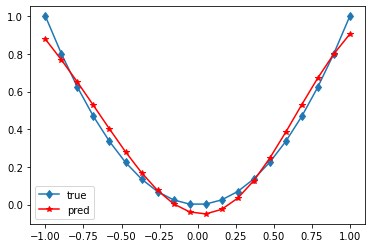

In [137]:
yprime = mlp(xb)
yprime2 = yprime.squeeze().detach()
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

In [138]:
dydx_true = 2*x

In [139]:
x = torch.linspace(-1,1,20, requires_grad = False)
xb = make_batch(x)
xb2 = xb.clone()
xb2.requires_grad = True
# xb.retain_grad()

In [140]:
yprime = mlp(xb2)

In [141]:
dydx = torch.autograd.grad(yprime.sum(), xb2, create_graph=True )[0]

In [142]:
d2yd2x = torch.autograd.grad(dydx.sum(), xb2, create_graph=True )[0]

In [143]:
d2yd2x

tensor([[-0.9001],
        [-0.7583],
        [-0.5078],
        [-0.1351],
        [ 0.3515],
        [ 0.9183],
        [ 1.5121],
        [ 2.0745],
        [ 2.5571],
        [ 2.9259],
        [ 3.1522],
        [ 3.1964],
        [ 3.0007],
        [ 2.5081],
        [ 1.7080],
        [ 0.6817],
        [-0.3976],
        [-1.3279],
        [-1.9633],
        [-2.2595]], grad_fn=<MmBackward>)

In [144]:
# x2 = add_zero(xb, zeros)
# x22 = x2.requires_grad()
yprime = mlp(xb)

# yprime_sum = yprime.sum()

# ones = torch.ones_like(yprime )
# dydx = torch.autograd.grad(yprime, x2,grad_outputs =ones , create_graph=True )[0]
dydx = torch.autograd.grad(yprime.sum(), xb, create_graph=True, retain_graph= True )[0]

# dydx_nobatch = debatch(dydx)

# plt.plot(x, dydx_true, 'd-', label= 'from analytical')
# plt.plot(x, dydx_nobatch, 'd-', label= 'from nn')
# plt.legend()

RuntimeError: One of the differentiated Tensors does not require grad

In [94]:
dydx

tensor([[-1.0091],
        [-1.5482],
        [-1.5406],
        [-1.5614],
        [-1.3743],
        [-1.1192],
        [-0.6324],
        [-0.4735],
        [-0.2425],
        [-0.0332],
        [ 0.0396],
        [ 0.2675],
        [ 0.4630],
        [ 0.7262],
        [ 1.1723],
        [ 1.3087],
        [ 1.5288],
        [ 1.5016],
        [ 1.4995],
        [ 0.9421]], grad_fn=<MmBackward>)

In [98]:
# dydx.requires_grad = True
dydx.requires_grad_(True)
dydx.retain_grad()
ones = torch.ones_like(dydx )
d2yd2x = torch.autograd.grad(dydx.sum(), xb , create_graph=True )[0]

In [99]:
d2yd2x

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<MmBackward>)

In [100]:
d2yd2x_nobatch = debatch(d2yd2x)

In [ ]:
# do_step_v2.clear_grad = False
# x2 = add_zero(xb, zeros)
# _ = do_step_v2(mlp, x2, yb, lr = 1e-1)


In [ ]:
# yprime = do_step_v2.yprime

In [ ]:
# yprime